#  **Exploratory Data Analysis (EDA) of Global Youtube Statistics (2023)**

# 1. Imports & Reading Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import csv dataset & convert to pandas dataframe (df)
df = pd.read_csv('/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv', encoding = 'latin-1')

# Set the display.max_columns option to None to display all columns of the df
pd.set_option('display.max_columns', None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv


# 2. Initial Data Exploration

In [2]:
# Review the top 10 rows of the df
df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.000000e+00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.0,3.0,3.0,7.316740e+08,182900.0,2900000.00,2200000.00,3.510000e+07,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,44.0,1.0,4.0,3.918400e+07,9800.0,156700.00,117600.00,1.900000e+06,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,630.0,5.0,25.0,4.894700e+07,12200.0,195800.00,146800.00,2.300000e+06,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,8.0,5.0,6.0,5.805740e+08,145100.0,2300000.00,1700000.00,2.790000e+07,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [3]:
# Display concise info about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [4]:
# Review descriptive statistics of numerical datatypes
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


# 3. Data Cleaning & Transformation

## 3.1 Column Review

In [5]:
# Review columns names for naming convention consistency & if all are required
print(df.columns)

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')


In [6]:
# Create a copy of the df for use during analysis
df = df.copy()

Column naming conventions aren't consistent so will need to be amended for comprehension

In [7]:
# Replace '_' with ' ' and capitalize the first letter of each word in column name
df.columns = df.columns.str.replace('_', ' ').str.title()
print(df.columns)

Index(['Rank', 'Youtuber', 'Subscribers', 'Video Views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel Type',
       'Video Views Rank', 'Country Rank', 'Channel Type Rank',
       'Video Views For The Last 30 Days', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Lowest Yearly Earnings',
       'Highest Yearly Earnings', 'Subscribers For Last 30 Days',
       'Created Year', 'Created Month', 'Created Date',
       'Gross Tertiary Education Enrollment (%)', 'Population',
       'Unemployment Rate', 'Urban Population', 'Latitude', 'Longitude'],
      dtype='object')


The rank column is the natural index of this dataset however we're going to drop this column as it will not be needed as we continue analysis

In [8]:
# Rank column dropped as not required
df = df.drop(columns = 'Rank')

# Confirm that 'Rank' has been dropped
print(df.columns)

Index(['Youtuber', 'Subscribers', 'Video Views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel Type',
       'Video Views Rank', 'Country Rank', 'Channel Type Rank',
       'Video Views For The Last 30 Days', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Lowest Yearly Earnings',
       'Highest Yearly Earnings', 'Subscribers For Last 30 Days',
       'Created Year', 'Created Month', 'Created Date',
       'Gross Tertiary Education Enrollment (%)', 'Population',
       'Unemployment Rate', 'Urban Population', 'Latitude', 'Longitude'],
      dtype='object')


## 3.2 Duplicate Review

In [9]:
# Duplicate check using the duplicated() method to mark duplicate rows
duplicates = df.duplicated()

# Filter the df using the boolean series to examine the duplicates
duplicate_rows = df[duplicates]

# No duplicate rows exist in the df
print(duplicate_rows)

Empty DataFrame
Columns: [Youtuber, Subscribers, Video Views, Category, Title, Uploads, Country, Abbreviation, Channel Type, Video Views Rank, Country Rank, Channel Type Rank, Video Views For The Last 30 Days, Lowest Monthly Earnings, Highest Monthly Earnings, Lowest Yearly Earnings, Highest Yearly Earnings, Subscribers For Last 30 Days, Created Year, Created Month, Created Date, Gross Tertiary Education Enrollment (%), Population, Unemployment Rate, Urban Population, Latitude, Longitude]
Index: []


No duplicate rows exist within the df so no further action is required

## 3.3 Missing Value Review 

In [10]:
# Count the number of missing values in the df
missing_values_count = df.isnull().sum()

# Display the count of missing values for incomplete columns
missing_values_count[missing_values_count > 0]

Category                                    46
Country                                    122
Abbreviation                               122
Channel Type                                30
Video Views Rank                             1
Country Rank                               116
Channel Type Rank                           33
Video Views For The Last 30 Days            56
Subscribers For Last 30 Days               337
Created Year                                 5
Created Month                                5
Created Date                                 5
Gross Tertiary Education Enrollment (%)    123
Population                                 123
Unemployment Rate                          123
Urban Population                           123
Latitude                                   123
Longitude                                  123
dtype: int64

There are a number of missing values within the dataset which will need to be replaced for consistency

In [11]:
# Select object datatype columns from df
categorical_columns = df.select_dtypes(include = ['object']).columns

# Replace object datatype column missing values with 'Unknown'
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

In [12]:
# Select numerical datatype columns from df
numerical_columns = df.select_dtypes(include = ['float', 'int64']).columns

# Replace numerical datatype column missing values with 'Unknown'
df[numerical_columns] = df[numerical_columns].fillna(0)

In [13]:
# Recalculate the number of missing values in the df
missing_values_count = df.isnull().sum()

# Valiate only 'Latitude' & 'Longitude' have missing values
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

## 3.4 Data Type Review

In [14]:
# Display concise info about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 995 non-null    object 
 1   Subscribers                              995 non-null    int64  
 2   Video Views                              995 non-null    float64
 3   Category                                 995 non-null    object 
 4   Title                                    995 non-null    object 
 5   Uploads                                  995 non-null    int64  
 6   Country                                  995 non-null    object 
 7   Abbreviation                             995 non-null    object 
 8   Channel Type                             995 non-null    object 
 9   Video Views Rank                         995 non-null    float64
 10  Country Rank                             995 non-n

Given the characteristics of the data being portrayed, it would be more suitable to represent a number of float columns as integers

In [15]:
# Convert several float data typescolumns to integars
df = df.astype({
    'Video Views': 'int64',
    'Video Views Rank': 'int64',
    'Country Rank': 'int64',
    'Channel Type Rank': 'int64',
    'Video Views For The Last 30 Days': 'int64',
    'Subscribers For Last 30 Days': 'int64',
    'Created Year': 'int64',
    'Population': 'int64',
    'Urban Population': 'int64'
})

# Validate results of datatype change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 995 non-null    object 
 1   Subscribers                              995 non-null    int64  
 2   Video Views                              995 non-null    int64  
 3   Category                                 995 non-null    object 
 4   Title                                    995 non-null    object 
 5   Uploads                                  995 non-null    int64  
 6   Country                                  995 non-null    object 
 7   Abbreviation                             995 non-null    object 
 8   Channel Type                             995 non-null    object 
 9   Video Views Rank                         995 non-null    int64  
 10  Country Rank                             995 non-n

## 3.5 Remove & Replace Unwanted Characters

A lot of YouTube channel names contain special characters which make analysing and differentiating difficult as they aren't accurately represented in the dataset. In a real life scenario these would be investigated and an appropriate solution to replace the values agreed, but for the purpose of this analysis I will remove & replace a range of non-alphanumeric characters

In [16]:
# Define remove & replace logic as replacing any non-alphanumeric characters
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'

# Replace characters 'Youtuber' & 'Title' with an empty string
df['Youtuber'] = df['Youtuber'].str.replace(pattern, '')
df['Title'] = df['Title'].str.replace(pattern, '')

/tmp/ipykernel_19/3584609919.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Youtuber'] = df['Youtuber'].str.replace(pattern, '')
/tmp/ipykernel_19/3584609919.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Title'] = df['Title'].str.replace(pattern, '')


In [17]:
# Remove any trailing/ leading whitespace from values
df['Youtuber'] = df['Youtuber'].str.strip()
df['Title'] = df['Title'].str.strip()

In [18]:
# Create filtered views of df to validate remove & replace
filter_youtuber_rows = df['Youtuber'].str.contains(pattern, regex = True)
filter_title_rows = df['Title'].str.contains(pattern, regex = True)

In [19]:
# Validate results of string remove & replace
filter_youtuber_rows_results = filter_youtuber_rows[filter_youtuber_rows == True]
print(filter_youtuber_rows_results)

Series([], Name: Youtuber, dtype: bool)


In [20]:
# Validate results of string remove & replace
filter_title_rows_results = filter_title_rows[filter_title_rows == True]
print(filter_title_rows_results)

Series([], Name: Title, dtype: bool)


## 3.6 Remove Unwanted Rows

In [21]:
# Filter for YouTube channels with 0 video views
filtered_df = df[df['Video Views'] == 0]
filtered_df

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude
1,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,4055159,7670,7423,12,0.0,0.05,0.04,0.58,0,2006,Mar,5.0,88.2,328239523,14.7,270663028,37.09024,-95.712891
5,Music,119000000,0,Unknown,Music,0,Unknown,Unknown,Music,4057944,0,0,0,0.0,0.00,0.00,0.00,0,2013,Sep,24.0,0.0,0,0.0,0,0.00000,0.000000
12,Gaming,93600000,0,Unknown,Gaming,0,Unknown,Unknown,Games,4057944,0,1,0,0.0,0.00,0.00,0.00,0,2013,Dec,15.0,0.0,0,0.0,0,0.00000,0.000000
18,Sports,75000000,0,Unknown,sports,3,United States,US,Entertainment,3898122,6266,5395,16,0.0,0.06,0.05,0.77,0,2006,Jan,30.0,88.2,328239523,14.7,270663028,37.09024,-95.712891
102,News,36300000,0,Unknown,News,0,Unknown,Unknown,Unknown,4057944,0,0,0,0.0,0.00,0.00,0.00,0,2013,Sep,9.0,0.0,0,0.0,0,0.00000,0.000000
173,Popular on YouTube,29300000,0,Unknown,Popular on Youtube,3,Unknown,Unknown,Education,4019724,0,4847,1,0.0,0.00,0.00,0.05,0,2017,Aug,7.0,0.0,0,0.0,0,0.00000,0.000000
360,Minecraft - Topic,20900000,0,Unknown,Minecraft - Topic,0,Unknown,Unknown,Games,4057944,0,24,0,0.0,0.00,0.00,0.00,300000,2013,Dec,20.0,0.0,0,0.0,0,0.00000,0.000000
592,Live,16100000,0,Unknown,Live,0,Unknown,Unknown,Unknown,4057944,0,0,0,0.0,0.00,0.00,0.00,0,2015,Jan,13.0,0.0,0,0.0,0,0.00000,0.000000


There are a number of YouTube channels which have 0 video views, these appear to be YouTube topics & not valid channels, for the purpose of this analysis these rows will be removed

In [22]:
# Remove rows from with 0 video views
for x in df.index:
    if df.loc[x, 'Video Views'] == 0:
        df.drop(x, inplace = True)
        
# Validate the results        
filtered_df = df[df['Video Views'] == 0]
filtered_df

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude


As I've cleaned the YouTuber column there are a number of YouTube channels with no valid name as they previously would've only contained special characters, for analysis purposes these will be removed. As stated above in a real life scenario these values would be replaced by an appropriate substitute

In [23]:
# Filter for YouTube channels with a blank 'Youtuber' name
filtered_df = df[df['Youtuber'] == '']
filtered_df

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude
64,,43200000,36458726976,Film & Animation,,1478,Russia,RU,Education,26,2,6,303780000,75900.0,1200000.0,911300.0,14600000.0,300000,2011,May,31.0,81.9,144373535,4.59,107683889,61.524010,105.318756
161,,30400000,17999961915,Unknown,,532,United States,US,Entertainment,147,46,46,122926000,30700.0,491700.0,368800.0,5900000.0,300000,2018,Nov,3.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
433,,19000000,4924054368,Education,,60,United States,US,Entertainment,1399,116,111,21587000,5400.0,86300.0,64800.0,1000000.0,100000,2018,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
447,,18800000,9594188708,Entertainment,,530,Ukraine,UA,Entertainment,483,2,113,68006000,17000.0,272000.0,204000.0,3300000.0,100000,2014,Oct,20.0,82.7,44385155,8.88,30835699,48.379433,31.165580
561,,16500000,2440934034,Entertainment,,421,United States,US,Entertainment,3778,137,133,21953000,5500.0,87800.0,65900.0,1100000.0,200000,2014,Mar,9.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
606,,15900000,1845329502,People & Blogs,Kung Fu Padla,0,Russia,RU,Games,4057944,3309,5665,0,0.0,0.0,0.0,0.0,10,2017,May,27.0,81.9,144373535,4.59,107683889,61.524010,105.318756
632,,15500000,8265129639,Shows,,1021,Saudi Arabia,SA,Film,619,4,33,135036000,33800.0,540100.0,405100.0,6500000.0,300000,2017,May,16.0,68.0,34268528,5.93,28807838,23.885942,45.079162
700,,14900000,439098,People & Blogs,,1,Russia,RU,News,3609784,10,19,7697,2.0,31.0,23.0,369.0,0,2008,Aug,11.0,81.9,144373535,4.59,107683889,61.524010,105.318756
707,,14800000,7018015062,Howto & Style,,2387,Ukraine,UA,Howto,828,3,25,47117000,11800.0,188500.0,141400.0,2300000.0,0,2015,Oct,12.0,82.7,44385155,8.88,30835699,48.379433,31.165580
714,,14700000,2230986039,Entertainment,,1385,Saudi Arabia,SA,Entertainment,4276,5,149,2694000,673.0,10800.0,8100.0,129300.0,0,2016,May,27.0,68.0,34268528,5.93,28807838,23.885942,45.079162


In [24]:
# Remove rows from with blank Youtuber as these are channels with only special characters
for x in df.index:
    if df.loc[x, 'Youtuber'] == '':
        df.drop(x, inplace = True)

# Validate the results
filtered_df = df[df['Youtuber'] == '']
filtered_df

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude


## 3.7 Sorting the DataFrame & Resetting the Index

In [25]:
# Sort values by number of 'Subscribers' descending from highest to lowest
df.sort_values(by = 'Subscribers', ascending = False)
df

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude
0,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,1,1,1,2258000000,564600.0,9000000.0,6800000.0,108400000.0,2000000,2006,Mar,13.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
2,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,48,1,1,1348000000,337000.0,5400000.0,4000000.0,64700000.0,8000000,2012,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2,2,1,1975000000,493800.0,7900000.0,5900000.0,94800000.0,1000000,2006,Sep,1.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
4,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,3,2,2,1824000000,455900.0,7300000.0,5500000.0,87500000.0,1000000,2006,Sep,20.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
6,Kids Diana Show,112000000,93247040539,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,5,3,3,731674000,182900.0,2900000.0,2200000.0,35100000.0,0,2015,May,12.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Natan por A,12300000,9029609749,Sports,Natan por A,1200,Brazil,BR,Entertainment,525,55,172,552513000,138100.0,2200000.0,1700000.0,26500000.0,700000,2017,Feb,12.0,51.3,212559417,12.08,183241641,-14.235004,-51.925280
991,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141,125,69,64735000,16200.0,258900.0,194200.0,3100000.0,300000,2018,Sep,14.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
992,Panda,12300000,2214684303,Unknown,HybridPanda,2452,United Kingdom,GB,Games,129005,867,1202,67035,17.0,268.0,201.0,3200.0,1000,2006,Sep,11.0,60.0,66834405,3.85,55908316,55.378051,-3.435973
993,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,35112,4,69,3871000,968.0,15500.0,11600.0,185800.0,100000,2012,May,9.0,67.0,10285453,6.48,9021165,60.128161,18.643501


In [26]:
# Resetting the index due to rows which have been dropped from the df
df = df.reset_index(drop = True)
df

,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude
0,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,1,1,1,2258000000,564600.0,9000000.0,6800000.0,108400000.0,2000000,2006,Mar,13.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
1,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,48,1,1,1348000000,337000.0,5400000.0,4000000.0,64700000.0,8000000,2012,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
2,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2,2,1,1975000000,493800.0,7900000.0,5900000.0,94800000.0,1000000,2006,Sep,1.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
3,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,3,2,2,1824000000,455900.0,7300000.0,5500000.0,87500000.0,1000000,2006,Sep,20.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
4,Kids Diana Show,112000000,93247040539,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,5,3,3,731674000,182900.0,2900000.0,2200000.0,35100000.0,0,2015,May,12.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Natan por A,12300000,9029609749,Sports,Natan por A,1200,Brazil,BR,Entertainment,525,55,172,552513000,138100.0,2200000.0,1700000.0,26500000.0,700000,2017,Feb,12.0,51.3,212559417,12.08,183241641,-14.235004,-51.925280
967,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141,125,69,64735000,16200.0,258900.0,194200.0,3100000.0,300000,2018,Sep,14.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
968,Panda,12300000,2214684303,Unknown,HybridPanda,2452,United Kingdom,GB,Games,129005,867,1202,67035,17.0,268.0,201.0,3200.0,1000,2006,Sep,11.0,60.0,66834405,3.85,55908316,55.378051,-3.435973
969,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,35112,4,69,3871000,968.0,15500.0,11600.0,185800.0,100000,2012,May,9.0,67.0,10285453,6.48,9021165,60.128161,18.643501


# 4. Summary Statistics

In [27]:
# Generate summary statistics for numerical columns, rounded to 0 decimal places
numerical_summary = df.describe().round().astype(int)
print(numerical_summary)

       Subscribers   Video Views  Uploads  Video Views Rank  Country Rank  \
count          971           971      971               971           971   
mean      22678682   11185171942     9401            522099           331   
std       16531111   14199677159    34544           1327434          1135   
min       12300000          2634        0                 0             0   
25%       14500000    4354556632      206               308             6   
50%       17700000    7857371770      744               905            35   
75%       24450000   13725304454     2740              3324           114   
max      245000000  228000000000   301308           4057944          7741   

       Channel Type Rank  Video Views For The Last 30 Days  \
count                971                               971   
mean                 713                         168637869   
std                 1909                         410912009   
min                    0                                 0

In [28]:
# Generate summary statistics for object columns
object_summary = df[categorical_columns].describe(include = ['object'])
print(object_summary)

       Youtuber       Category   Title        Country Abbreviation  \
count       971            971     971            971          971   
unique      969             19     966             50           50   
top      Beyonc  Entertainment  Beyonc  United States           US   
freq          2            236       2            307          307   

         Channel Type Created Month  
count             971           971  
unique             15            13  
top     Entertainment           Jan  
freq              295            99  


# 5. Cleaned Data Output

In [29]:
# Output the DataFrame to a CSV file
df.to_csv('/kaggle/working/global_youtube_statistics_2023_cleaned.csv',index = False, encoding = 'latin-1')

# 6. Data Visualisation & Analysis

## 6.1 Apply Seaborn Plot Style

In [30]:
# Apply plot style 'seaborn' for visualisations                  
plt.style.use('seaborn')

/tmp/ipykernel_19/4032772056.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 6.2 Correlation Matrix Heatmap

/tmp/ipykernel_19/3623516386.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


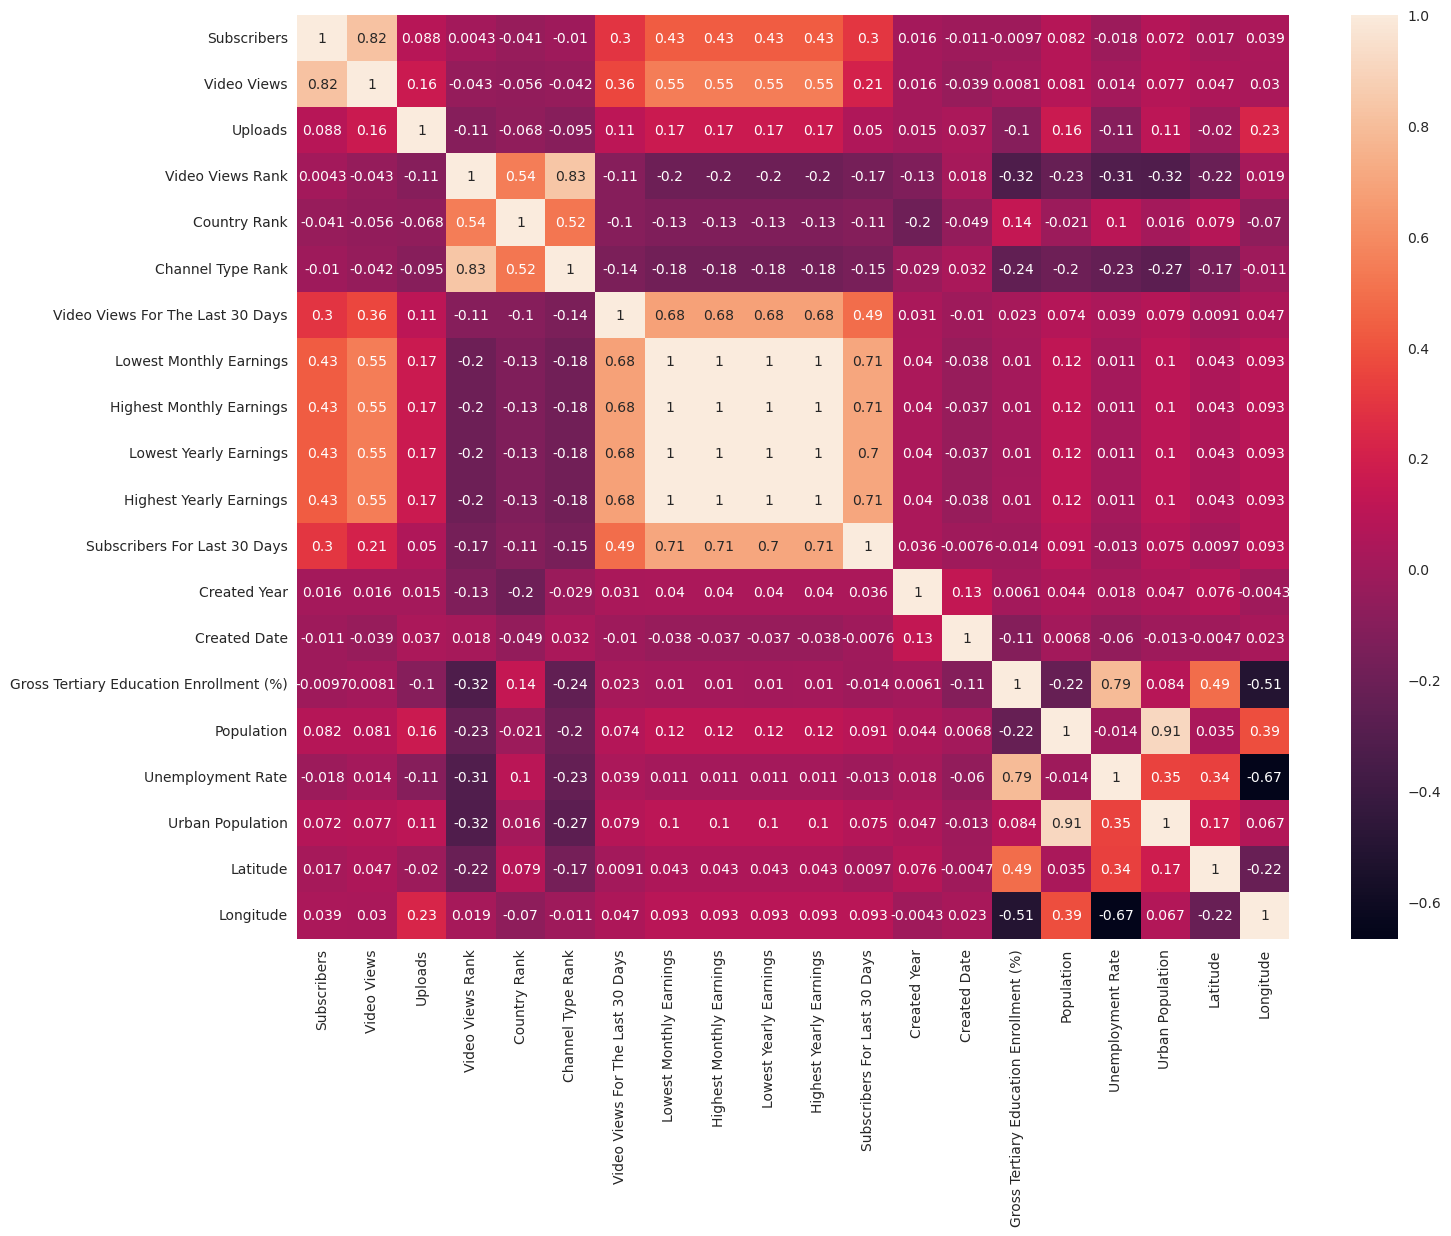

In [31]:
# Adjust the default figure size for matplotlib plots
plt.rcParams['figure.figsize'] = (16, 12)

# Generate correlation matrix heatmap
sns.heatmap(df.corr(), annot = True)

# Display the correlation matrix heatmap
plt.show()

Some intital thoughts and observations which might be worth exploring further based on the correlation matrix heatmap:

1. There is a strong positive correlation between subscribers and video views, suggesting that channels with more subscribers tend to have higher view counts. It might be interesting to understand what % of video views for a channel come from existing subscribers vs. unsubscribed viewers & if there is any trends with this amongst different video categories.

2. Earnings show a low to moderate positive correlation with both the number of subscribers and video views a YouTube channel has, this could be due to several reasons such as ad revenue variability, audience engagment or monetisation methods. It might be interesting to understand how earnings differ amongst different variables such as different video categories, but I suspect for a deeper understanding of what drives monetisation additional data would be required.

3. When comparing earnings to the number of video uploads, there's a negligible positive correlation which appears to indicate that uploading more videos doesn't necessarily equate to increased earnings. Building on points above it might be interesting to look at if there are any occurances of high earnings and comparatively low video uploads to see if there are particular trends or relationships worth exploring.

## 6.3 Who are the top 10 YouTube Channels by no. Subscribers?

In [32]:
# Select columns to show in output
selected_columns = ['Youtuber', 'Subscribers']

# Filter df for top 10 most subscribed YouTube channels 
top_10_channels = df.loc[0:9, selected_columns]

# Sort values so that highest output is descending, this is for the horizontal bar chart
top_10_channels_desc = top_10_channels.sort_values(by = 'Subscribers', ascending = True)

# Validate filtered df output
print(top_10_channels_desc)

                     Youtuber  Subscribers
9                         WWE     96000000
8           Zee Music Company     96700000
7               Vlad and Niki     98900000
6                 Like Nastya    106000000
5                   PewDiePie    111000000
4             Kids Diana Show    112000000
3                   SET India    159000000
2  Cocomelon - Nursery Rhymes    162000000
1                     MrBeast    166000000
0                    T-Series    245000000


In [33]:
# Reflect 'Subscriber' in millions
top_10_channels['Subscribers (mn.)'] = (top_10_channels['Subscribers'] / 1000000).astype(int)
top_10_channels_desc['Subscribers (mn.)'] = (top_10_channels_desc['Subscribers'] / 1000000).astype(int)

# Select columns to show in output
top_10_channels_desc = top_10_channels_desc[['Youtuber', 'Subscribers (mn.)']]

# Validate sorted output
print(top_10_channels_desc)

                     Youtuber  Subscribers (mn.)
9                         WWE                 96
8           Zee Music Company                 96
7               Vlad and Niki                 98
6                 Like Nastya                106
5                   PewDiePie                111
4             Kids Diana Show                112
3                   SET India                159
2  Cocomelon - Nursery Rhymes                162
1                     MrBeast                166
0                    T-Series                245


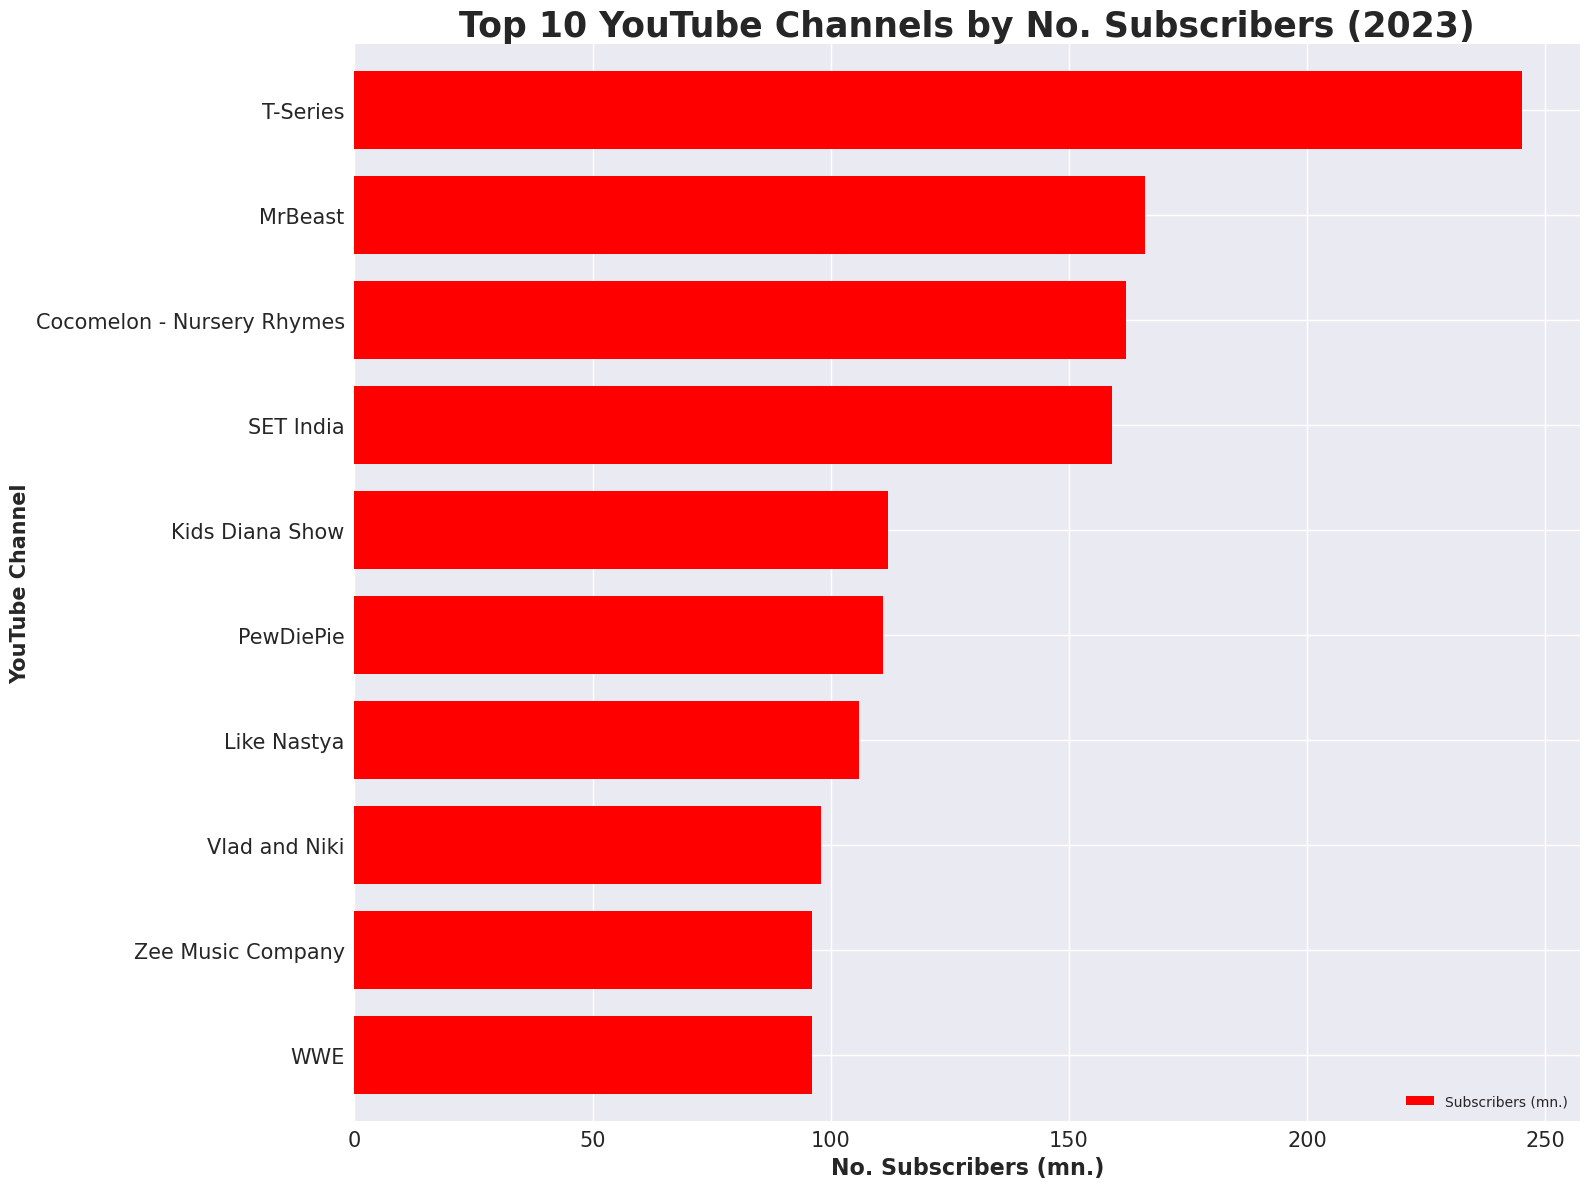

In [34]:
# Plot df as a horizontal bar chart
top_10_channels_desc.plot.barh(x = 'Youtuber', y = 'Subscribers (mn.)', stacked = True, color = '#FF0000', width = 0.75)

# Adjust chart formatting 
plt.title('Top 10 YouTube Channels by No. Subscribers (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('No. Subscribers (mn.)', fontsize = 16,  weight = 'bold')
plt.ylabel('YouTube Channel', fontsize = 15, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

**Observations**

1. 'T-Series' decisively leads the race for the most-subscribed YouTube channel, boasting nearly 250 million subscribers.

2. The prominence of channels like 'Cocomelon - Nursery Rhymes' and 'Kids Diana Show' highlights the prevailing trend of contemporary parenting leaning heavily on children's entertainment channels.

3. Contrary to perceptions of its heyday in the 90s and early 2000s, 'WWE' remains vibrantly active and popular in 2023.

## 6.4 What are the top 10 Channel Categories by no. YouTube channels?

In [35]:
# Calculate the number of YouTube channels in each category & select the top 10 values
category_counts_asc = df['Category'].value_counts(ascending = True)
top_10_categories_asc = category_counts_asc.tail(10)

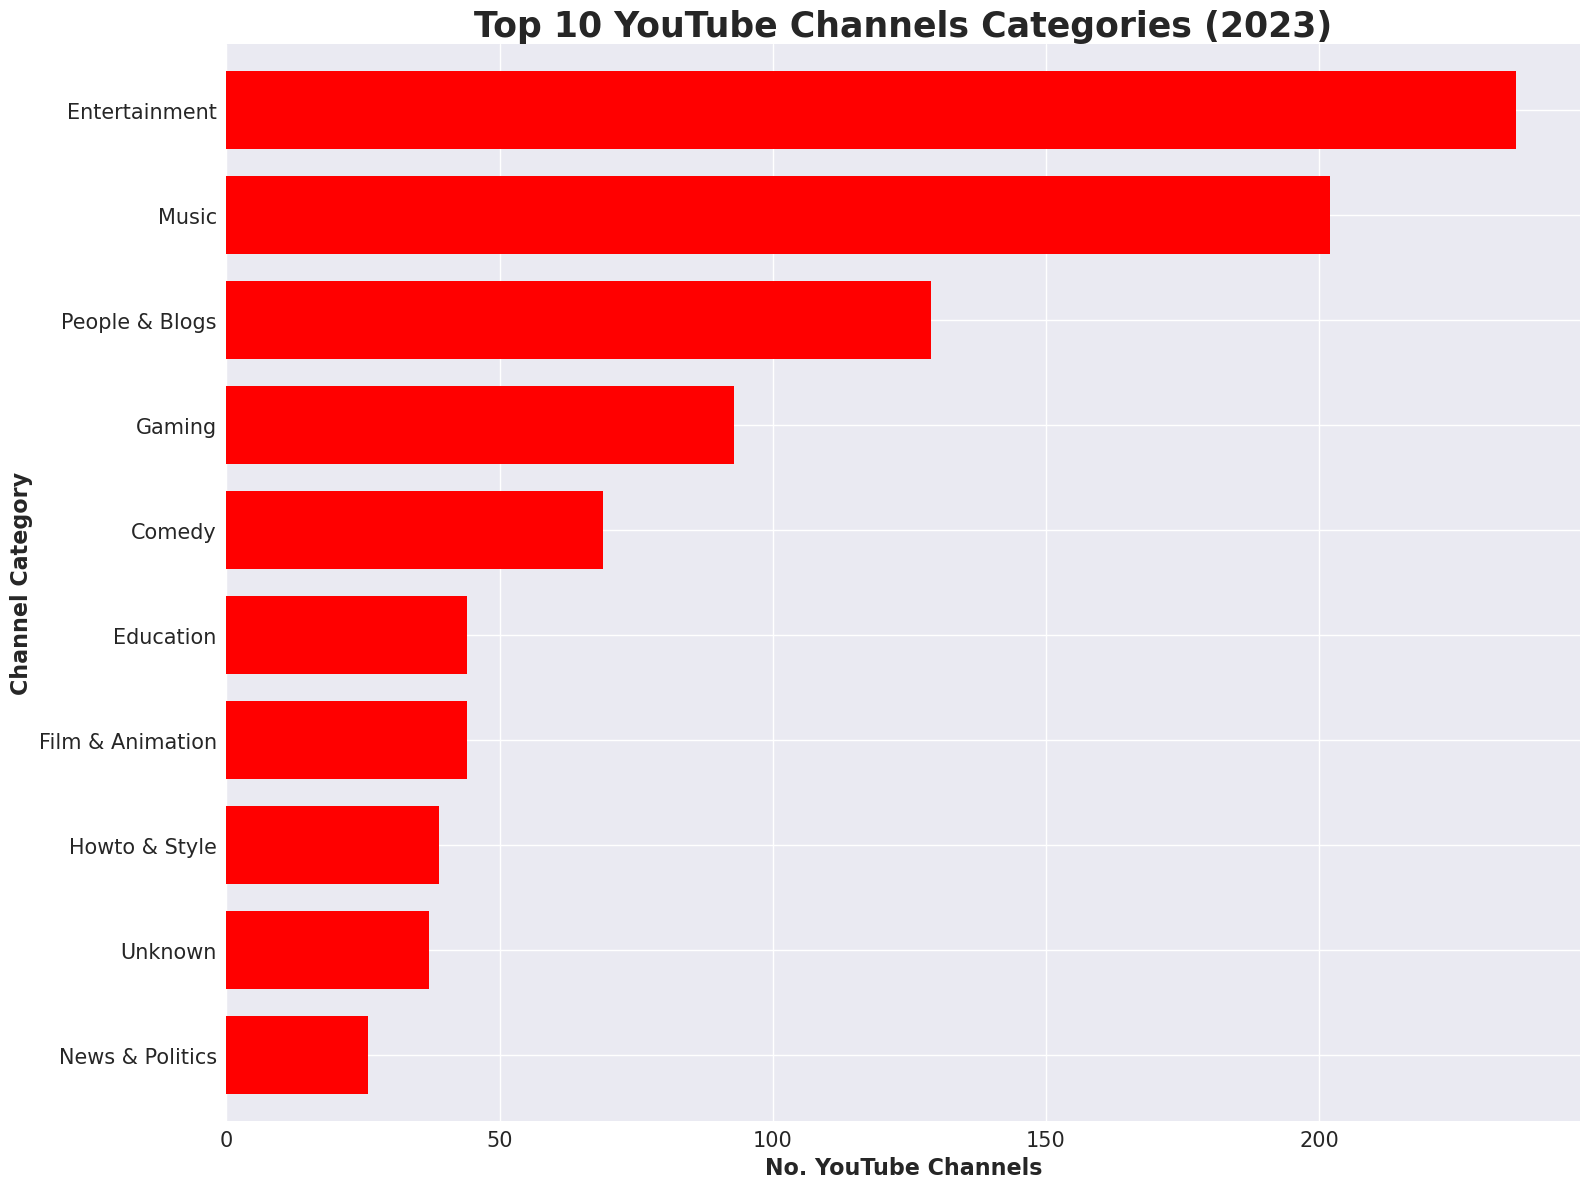

In [36]:
# Plot df as a horizontal bar chart
top_10_categories_asc.plot.barh(x = 'No. YouTube Channels', y = 'Category', stacked = True, color = '#FF0000', width = 0.75)

# Adjust chart formatting 
plt.title('Top 10 YouTube Channels Categories (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('No. YouTube Channels', fontsize = 16,  weight = 'bold')
plt.ylabel('Channel Category', fontsize = 16, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

**Observations**

1. Viewers predominantly turn to YouTube for entertainment, as evidenced by categories like 'Entertainment', 'Music', 'Gaming', and 'Comedy' occupying four of the top five channel categories.

2. The 'Music' category ranks second in popularity, a surge that might be attributed to the recent introduction of 'YouTube Music'. This initiative was launched to compete with other renowned music streaming platforms like Spotify and Amazon Music.

3. There's a notable demand for educational and instructional content on YouTube. This is underscored by the 'Education' and 'How to & Style' categories, both of which secure positions within the top 10 channel categories.

## 6.5 Which Countries have the Highest Number of YouTubers?

In [37]:
# Calculate the number of YouTuber channels in each country
country_counts_asc = df['Country'].value_counts(ascending = True)

# Select the top 10 countries based on the number of YouTube channels
top_10_countries = country_counts_asc.tail(10)

# Data for the top 10 categories and the sum of the remaining categories
data = top_10_countries.tolist()
data += [country_counts_asc[:-10].sum()]

# Labels for the top 10 categories and 'Others' for the remaining categories
labels = top_10_countries.index.tolist() + ['Others']
         
# Set colour palette for the top 10 categories & a seperate colour for 'Others'
colors = sns.color_palette("pastel", 10)

# Gray color for 'Others'
colors += [(0.8, 0.8, 0.8)]  

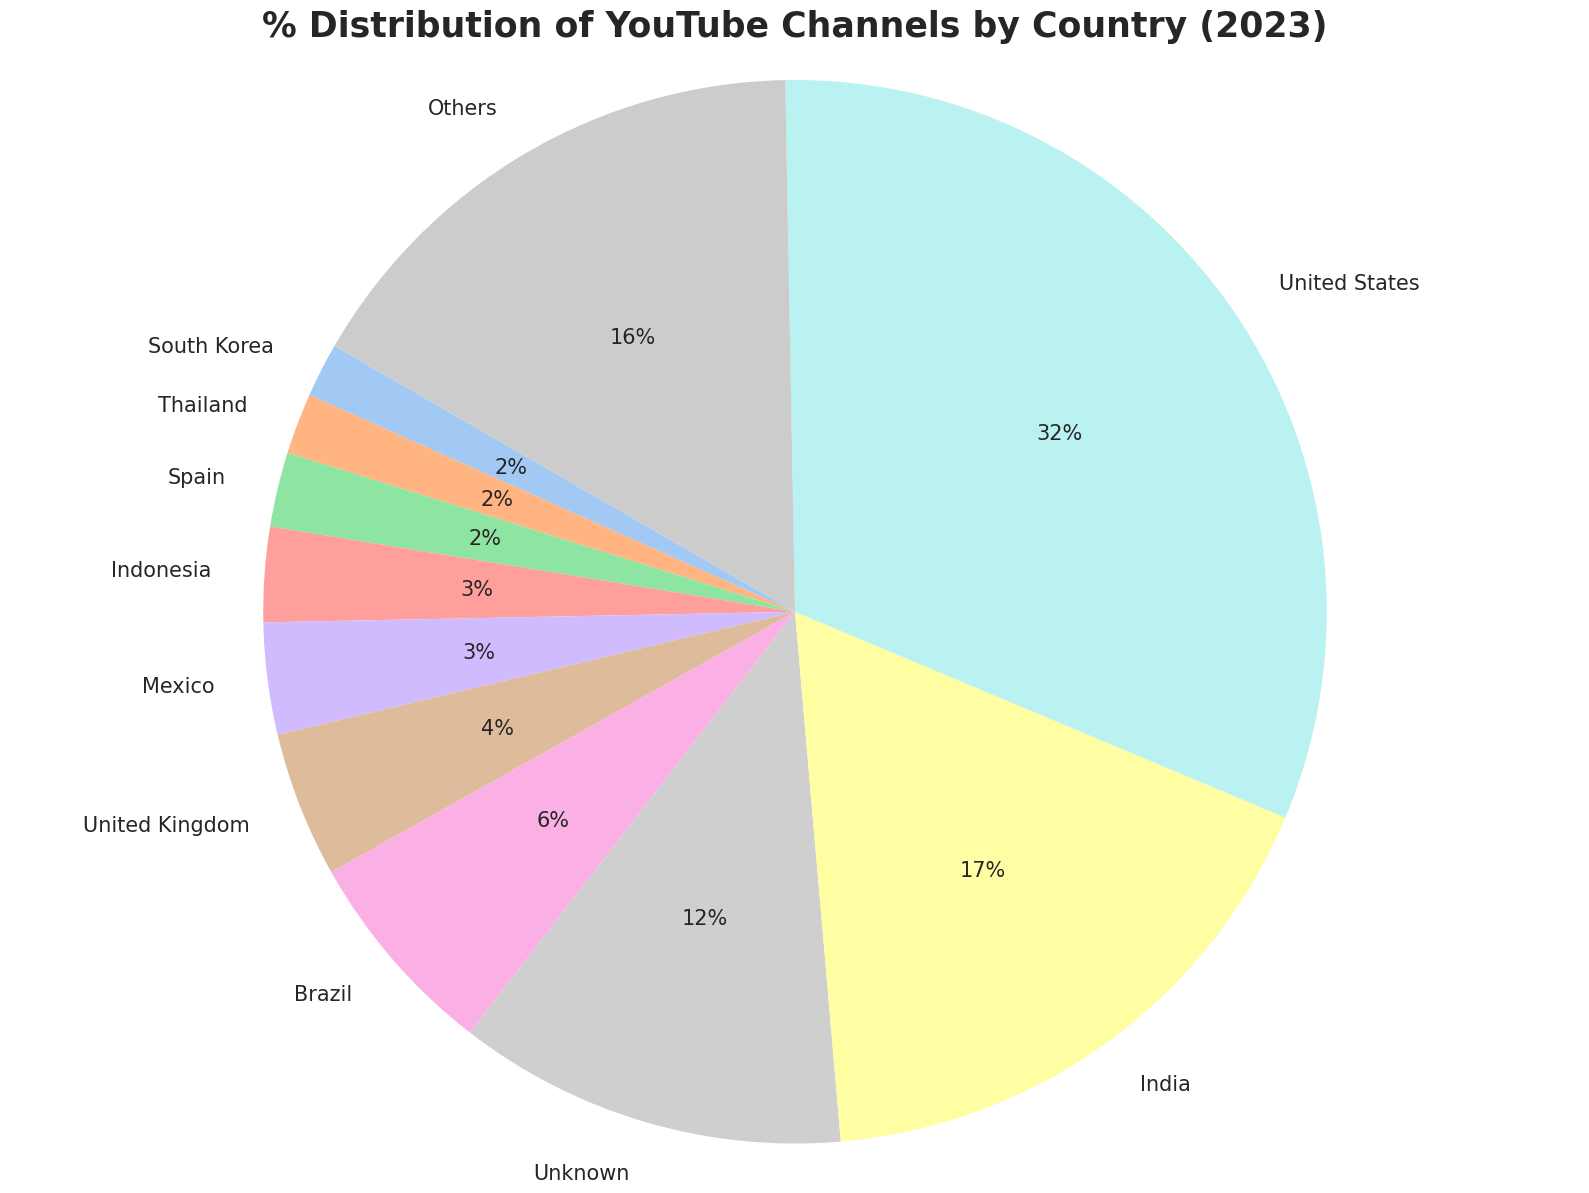

In [38]:
# create a pie chart using Matplotlib with adjusted start angle and larger font size
wedges, texts, autotexts = plt.pie(data, labels = labels, autopct = '%1.0f%%', colors = colors, startangle = 150, textprops = {'fontsize': 15})

# equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# increase the font size of the pie chart labels and percentage values
for text in texts:
    text.set_fontsize(15)
for autotext in autotexts:
    autotext.set_fontsize(15)
    
# Adjust chart formatting 
plt.title('% Distribution of YouTube Channels by Country (2023)', fontsize = 25, weight = 'bold')
plt.tight_layout()

**Observations**

1. The United States and India lead the global rankings of the top YouTube channels in 2023, together comprising approximately 50% of all channels in this dataset.

2. A notable portion of channels lack a specified country. Acquiring this missing data might influence the composition of the top 10 countries.

3. The pie chart reveals a distinct disparity among continents in terms of producing top YouTube channels. North America and Asia significantly outpace their continental peers, holding around 32% and 24% respectively. In contrast, both South America and Europe represent a mere 6%.

## 6.6 Is There a Correlation Between the Number of Subscribers and the Number of Video Views?

In [39]:
# Create new subset for expressing values in millions
df_mns = df

# Create new columns to support visualisation
df_mns['Subscribers (mn.)'] = (df_mns['Subscribers'] / 1000000).astype(int)
df_mns['Video Views (bn.)'] = (df_mns['Video Views'] / 1000000000).astype(int)
df_mns['Uploads (k.)'] = (df_mns['Uploads'] / 1000)

# Create new subset for scatter plot
df_sub_pop = df_mns[['Subscribers (mn.)', 'Video Views (bn.)']]
df_sub_pop

,Subscribers (mn.),Video Views (bn.)
0,245,228
1,166,28
2,162,164
3,159,148
4,112,93
...,...,...
966,12,9
967,12,1
968,12,2
969,12,0


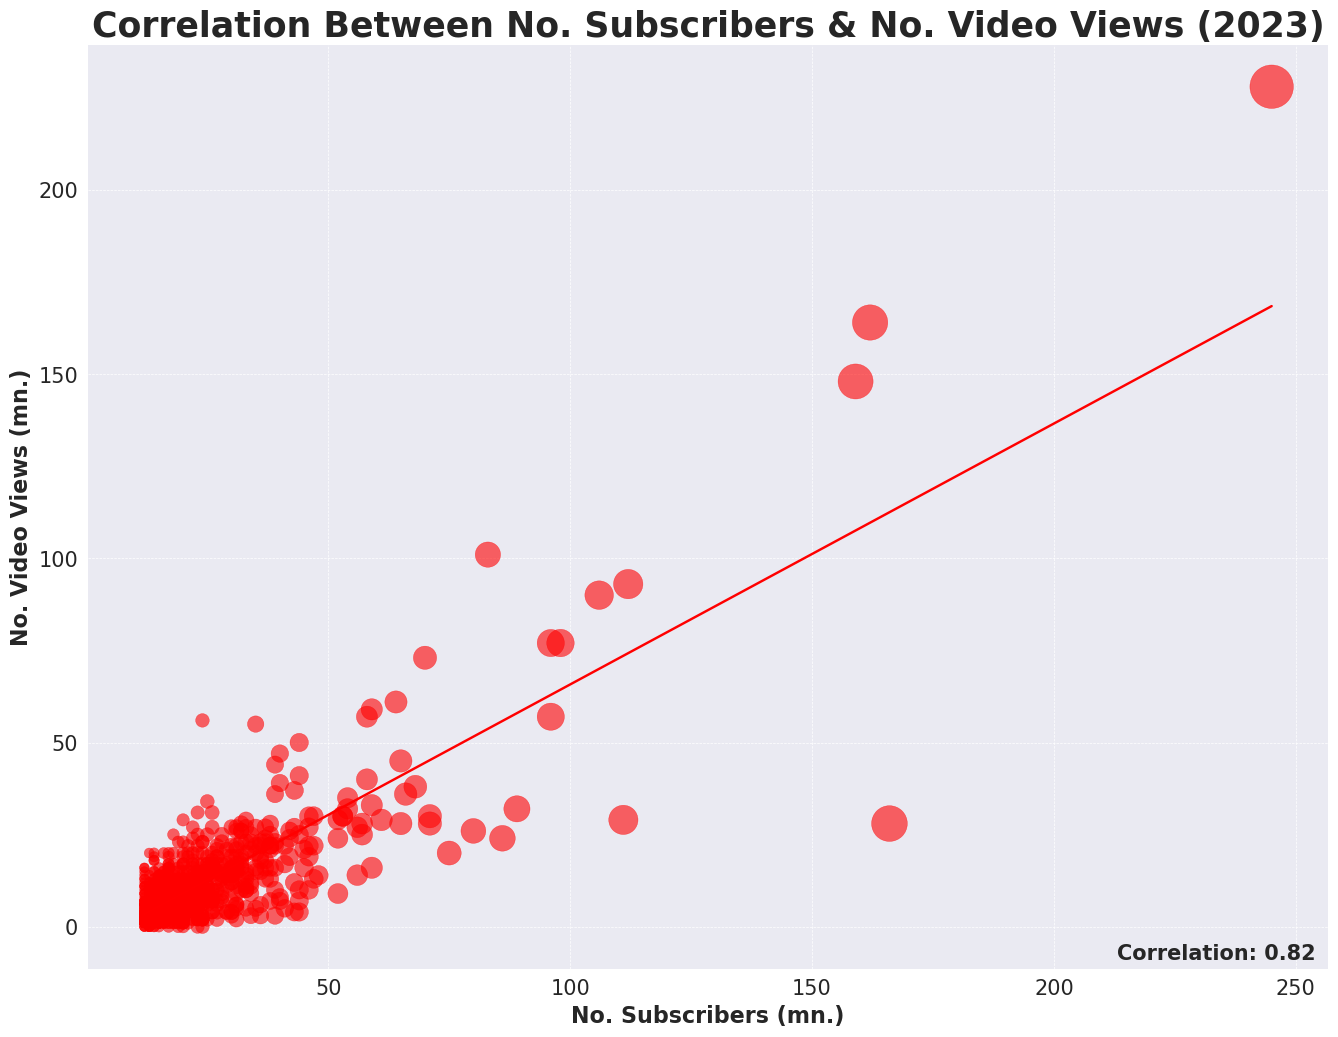

In [40]:
# Calculate the correlation coefficient
correlation = df_sub_pop['Subscribers (mn.)'].corr(df_sub_pop['Video Views (bn.)'])

# Create linear regression for trend line
m, b = np.polyfit(df_sub_pop['Subscribers (mn.)'], df_sub_pop['Video Views (bn.)'], 1)

# Set scaling factor of circle size
scaling_factor = 4

# Calculate the size of circles 
sizes = df_sub_pop['Subscribers (mn.)'] * scaling_factor

# Set figuresize
plt.figure(figsize=(16, 12))

# Plot df as a scatter
plt.scatter(df_sub_pop['Subscribers (mn.)'], df_sub_pop['Video Views (bn.)'], s = sizes, color = '#FF0000', alpha=0.6)

# Plot trendline
plt.plot(df_sub_pop['Subscribers (mn.)'], m * df_sub_pop['Subscribers (mn.)'] + b, color='#FF0000')

# Adjust chart formatting 
plt.title('Correlation Between No. Subscribers & No. Video Views (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('No. Subscribers (mn.)', fontsize = 16,  weight = 'bold')
plt.ylabel('No. Video Views (mn.)', fontsize = 16,  weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.annotate(f'Correlation: {correlation:.2f}', 
             xy = (0.83, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 15, 
             weight = 'bold')

plt.show()

**Observations**

1. Echoing my initial insights, a pronounced positive correlation between subscribers and video views is evident. This reinforces the idea that channels with a larger subscriber base often achieve higher view counts.

2. Most data points on the scatter plot cluster in the lower ranges for both subscribers and video views. In contrast, a few outlier channels boast significantly larger audiences. It would be interesting to delve deeper into these outliers to uncover the strategies fueling their exceptional engagement.

## 6.7 Is There a Correlation Between the Number of Subscribers and the Number of Video Uploads?

In [41]:
# Create new variable for expressing values in millions
df_mns = df

# Create new df for scatter plot
df_sub_pop_2 = df_mns[['Subscribers (mn.)', 'Uploads (k.)']]
df_sub_pop_2

,Subscribers (mn.),Uploads (k.)
0,245,20.082
1,166,0.741
2,162,0.966
3,159,116.536
4,112,1.111
...,...,...
966,12,1.200
967,12,1.500
968,12,2.452
969,12,0.039


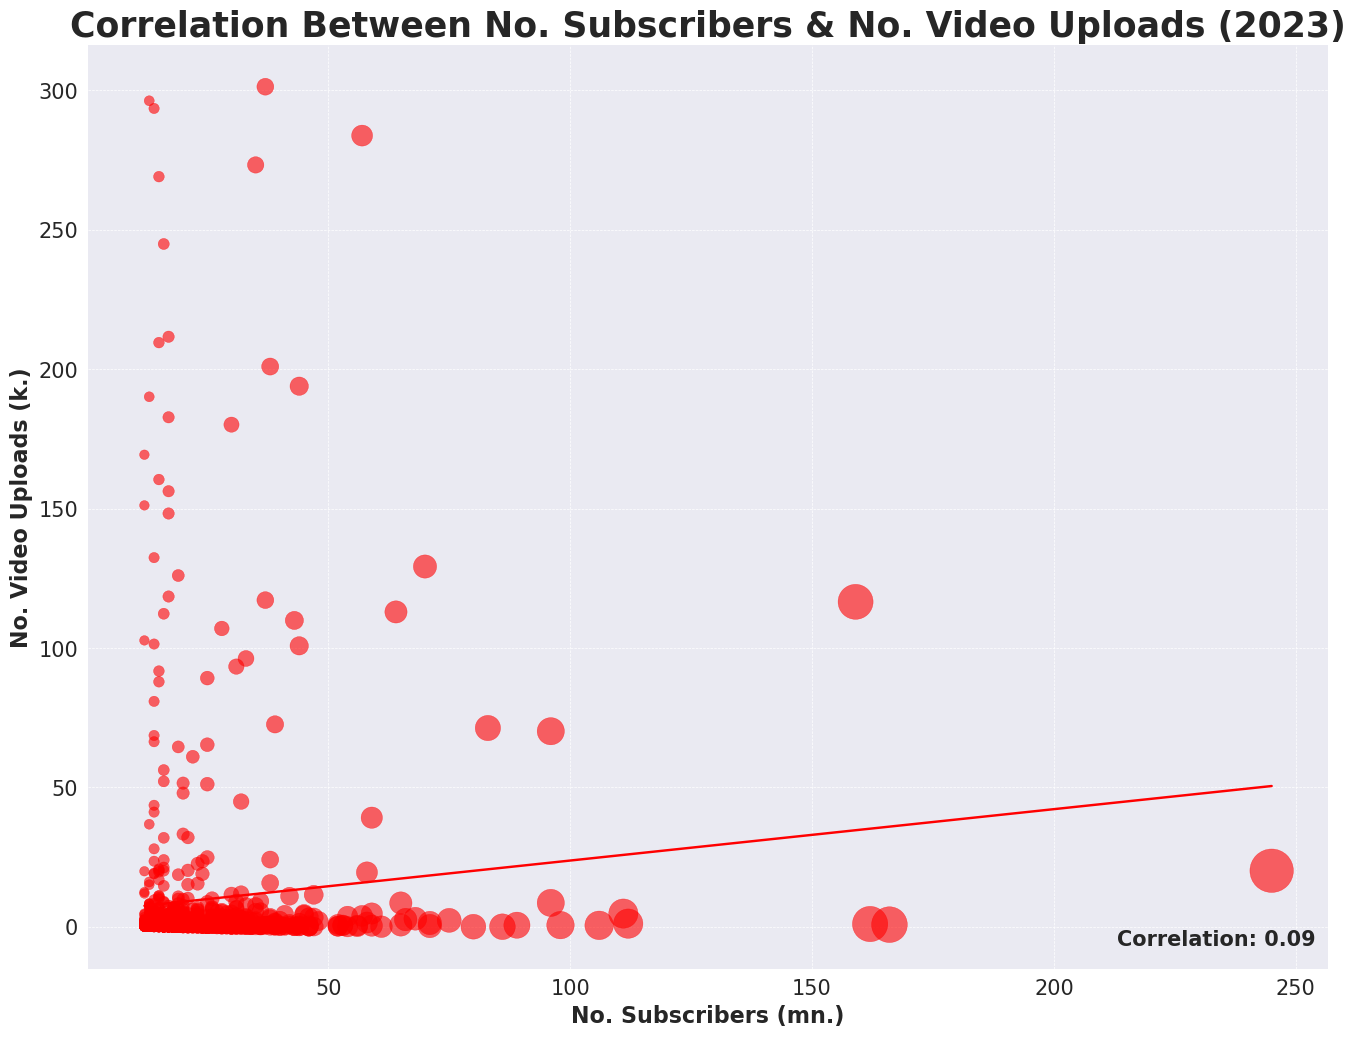

In [42]:
# Calculate the correlation coefficient
correlation = df_sub_pop_2['Subscribers (mn.)'].corr(df_sub_pop_2['Uploads (k.)'])

# Create linear regression for trend line
m, b = np.polyfit(df_sub_pop_2['Subscribers (mn.)'], df_sub_pop_2['Uploads (k.)'], 1)

# Set scaling factor of circle size
scaling_factor = 4 

# Calculate the size of circles 
sizes = df_sub_pop_2['Subscribers (mn.)'] * scaling_factor

# Set figuresize
plt.figure(figsize = (16, 12))

# Plot df as a scatter
plt.scatter(df_sub_pop_2['Subscribers (mn.)'], df_sub_pop_2['Uploads (k.)'], s = sizes, color = '#FF0000', alpha = 0.6)

# Plot trendline
plt.plot(df_sub_pop_2['Subscribers (mn.)'], m * df_sub_pop_2['Subscribers (mn.)'] + b, color = '#FF0000')

# Adjust chart formatting 
plt.title('Correlation Between No. Subscribers & No. Video Uploads (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('No. Subscribers (mn.)', fontsize = 16, weight = 'bold')
plt.ylabel('No. Video Uploads (k.)', fontsize = 16, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.annotate(f'Correlation: {correlation:.2f}', 
             xy = (0.83, 0.025), 
             xycoords = 'axes fraction', 
             fontsize = 15, 
             weight = 'bold')

plt.show()

**Observations**

1. A negligible positive correlation exists between the number of subscribers a channel has and the number of videos they've uploaded. This implies that the quality and content of videos may play a more pivotal role in garnering subscribers than merely the quantity of uploads.

2. Some channels display a unique contrast with a low subscriber count yet a remarkably high number of videos. This could suggest the presence of a robust content team working behind the scenes, consistently producing videos. It's plausible that such channels belong to the news, entertainment, or music sectors, known for uploading multiple short-duration videos daily, such as news headlines or interview excerpts.

## 6.8 Are Certain Channel Categories Correlated with High Viewer or Subscriber Counts?

In [43]:
# Create new subset to group by category & aggregate columns
category_sum = df.groupby('Category').agg({
    'Subscribers (mn.)': 'sum',
    'Video Views (bn.)': 'sum'
}).reset_index()

# Validate results of new df
print(category_sum)

                 Category  Subscribers (mn.)  Video Views (bn.)
0        Autos & Vehicles                 35                 14
1                  Comedy               1361                518
2               Education               1154                668
3           Entertainment               4982               2393
4        Film & Animation               1083                485
5                  Gaming               1910                666
6           Howto & Style                743                171
7                  Movies                 50                 15
8                   Music               5106               3020
9         News & Politics                525                260
10  Nonprofits & Activism                 54                 10
11         People & Blogs               2677               1191
12         Pets & Animals                 70                 42
13   Science & Technology                309                 59
14                  Shows               

In [44]:
# Sort categories by no. Subscribers (mn.)
category_sum_subs = category_sum.sort_values(by = 'Subscribers (mn.)', ascending = False)
category_sum_subs

,Category,Subscribers (mn.),Video Views (bn.)
8,Music,5106,3020
3,Entertainment,4982,2393
11,People & Blogs,2677,1191
5,Gaming,1910,666
1,Comedy,1361,518
2,Education,1154,668
4,Film & Animation,1083,485
6,Howto & Style,743,171
18,Unknown,653,262
9,News & Politics,525,260


In [45]:
# Sort categories by no. Video Views (bn.)
category_sum_views = category_sum.sort_values(by = 'Video Views (bn.)', ascending = False)
category_sum_views

,Category,Subscribers (mn.),Video Views (bn.)
8,Music,5106,3020
3,Entertainment,4982,2393
11,People & Blogs,2677,1191
2,Education,1154,668
5,Gaming,1910,666
1,Comedy,1361,518
4,Film & Animation,1083,485
14,Shows,508,428
18,Unknown,653,262
9,News & Politics,525,260


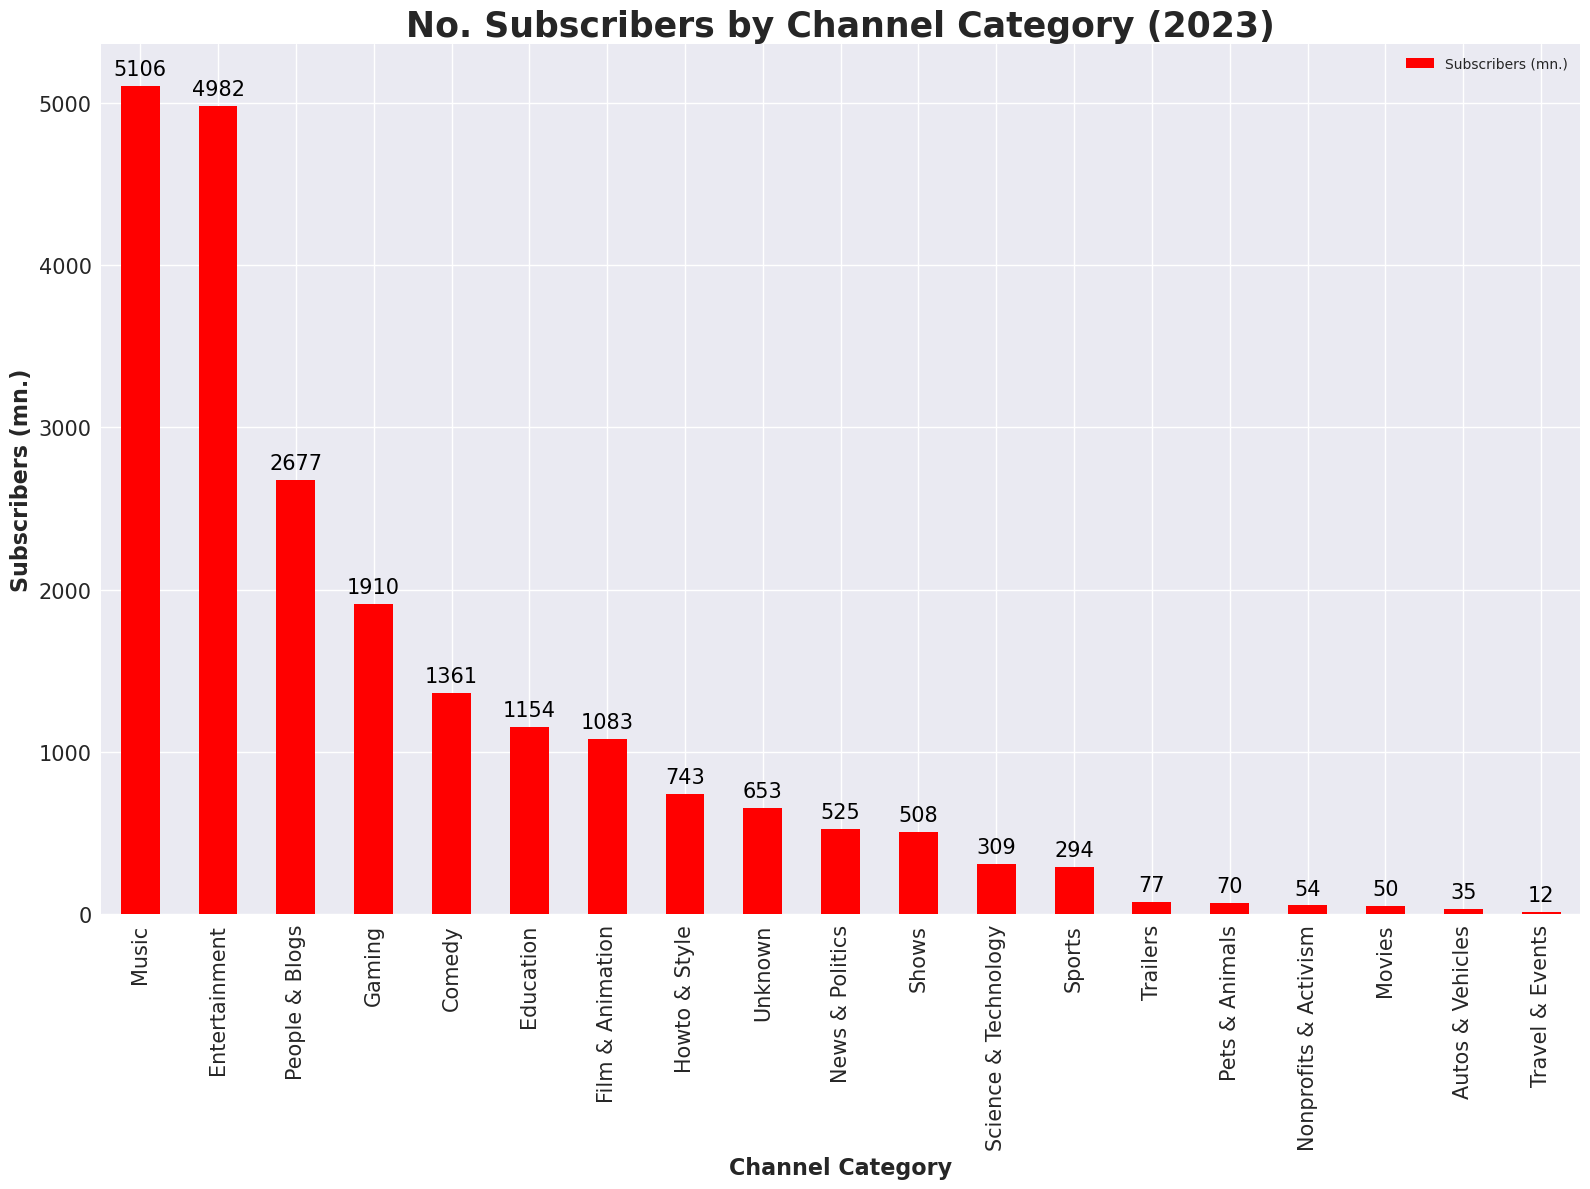

In [46]:
# Plot df as a bar chart
ax = category_sum_subs.plot(kind = 'bar', stacked = True, x = 'Category', y = 'Subscribers (mn.)', color = '#FF0000')

# Add data labels above the bars
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', color='black', fontsize = 15, padding = 5)

# Adjusting the chart formatting
plt.title('No. Subscribers by Channel Category (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('Channel Category', fontsize = 16,  weight = 'bold')
plt.ylabel('Subscribers (mn.)', fontsize = 16, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

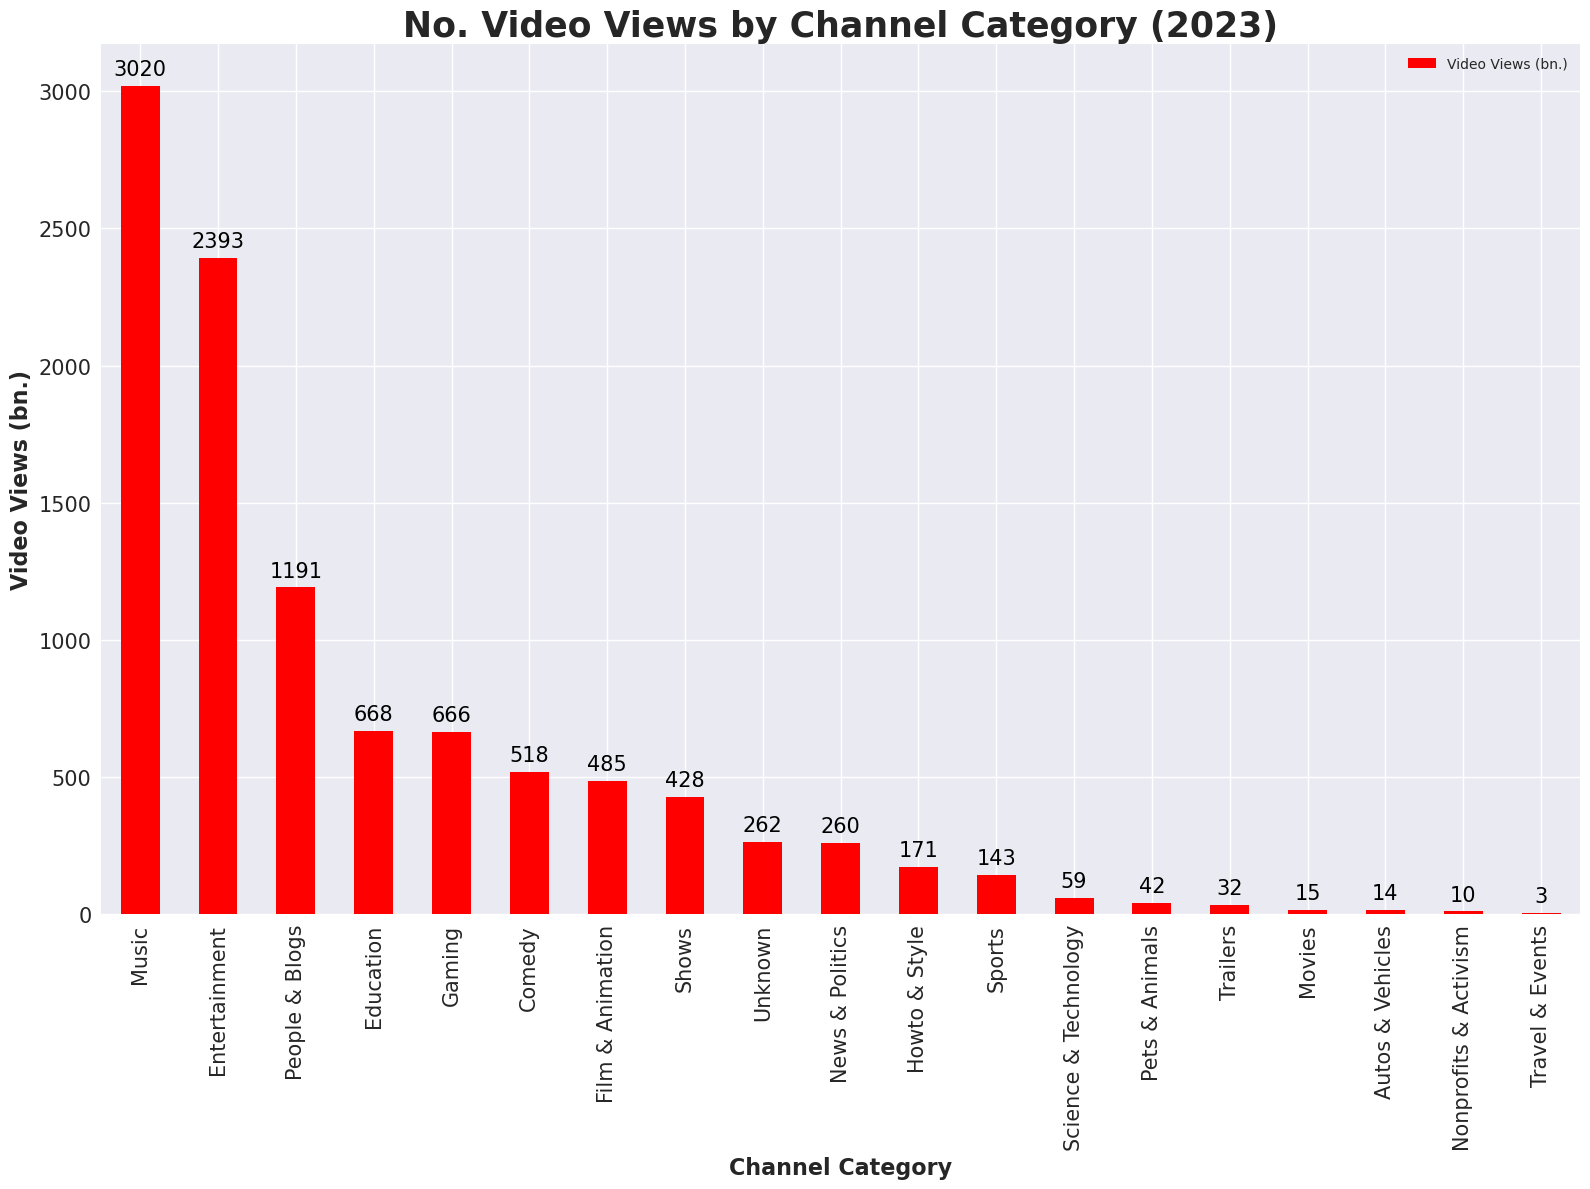

In [47]:
# Plot df as a bar chart
ax = category_sum_views.plot(kind = 'bar', stacked = True, x = 'Category', y = 'Video Views (bn.)', color = '#FF0000')

# Add data labels above the bars
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', color='black', fontsize = 15, padding = 5)

# Adjusting the chart formatting
plt.title('No. Video Views by Channel Category (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('Channel Category', fontsize = 16,  weight = 'bold')
plt.ylabel('Video Views (bn.)', fontsize = 16, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()

**Observations**

1. As depicted in Fig. 6.4, various YouTube channel categories demonstrate high numbers of subscribers and video views. While 'Entertainment' emerges as the predominant category, it's the 'Music' category that claims a superior total in both subscribers and video views. Impressively, both the 'Music' and 'Entertainment' categories surpass others by a significant margin, amassing nearly double the subscribers and video views of the third-ranking category, 'People & Blogs'.

2. For those looking to launch a YouTube channel with aspirations of gaining a committed audience and significant view counts, it's crucial to recognise which categories pull in the most subscribers and video views. Navigating a saturated category might pose challenges in standing out, yet the potential in audience engagement is considerable. On the other hand, while less populated categories could provide an easier entry, they might cap the possible audience interest and size.

## 6.9 Which Categories Have the Most Engaged Audiences, as Measured by Views per Subscriber?

In [48]:
# Create new subset using raw values
category_sum_raw = df.groupby('Category').agg({
    'Subscribers': 'sum',
    'Video Views': 'sum'
}).reset_index()

# Create new variable to calculate the 'Subscriber to View Ratio'
category_sum_raw['View-to-Subscriber Ratio'] = category_sum_raw['Video Views'] / category_sum_raw['Subscribers']
category_sum_raw['View-to-Subscriber Ratio'] = category_sum_raw['View-to-Subscriber Ratio'].astype(float)

# Sort df by 'Subscriber to View Ratio' descending
category_sum_raw = category_sum_raw.sort_values(by = 'View-to-Subscriber Ratio', ascending = False)

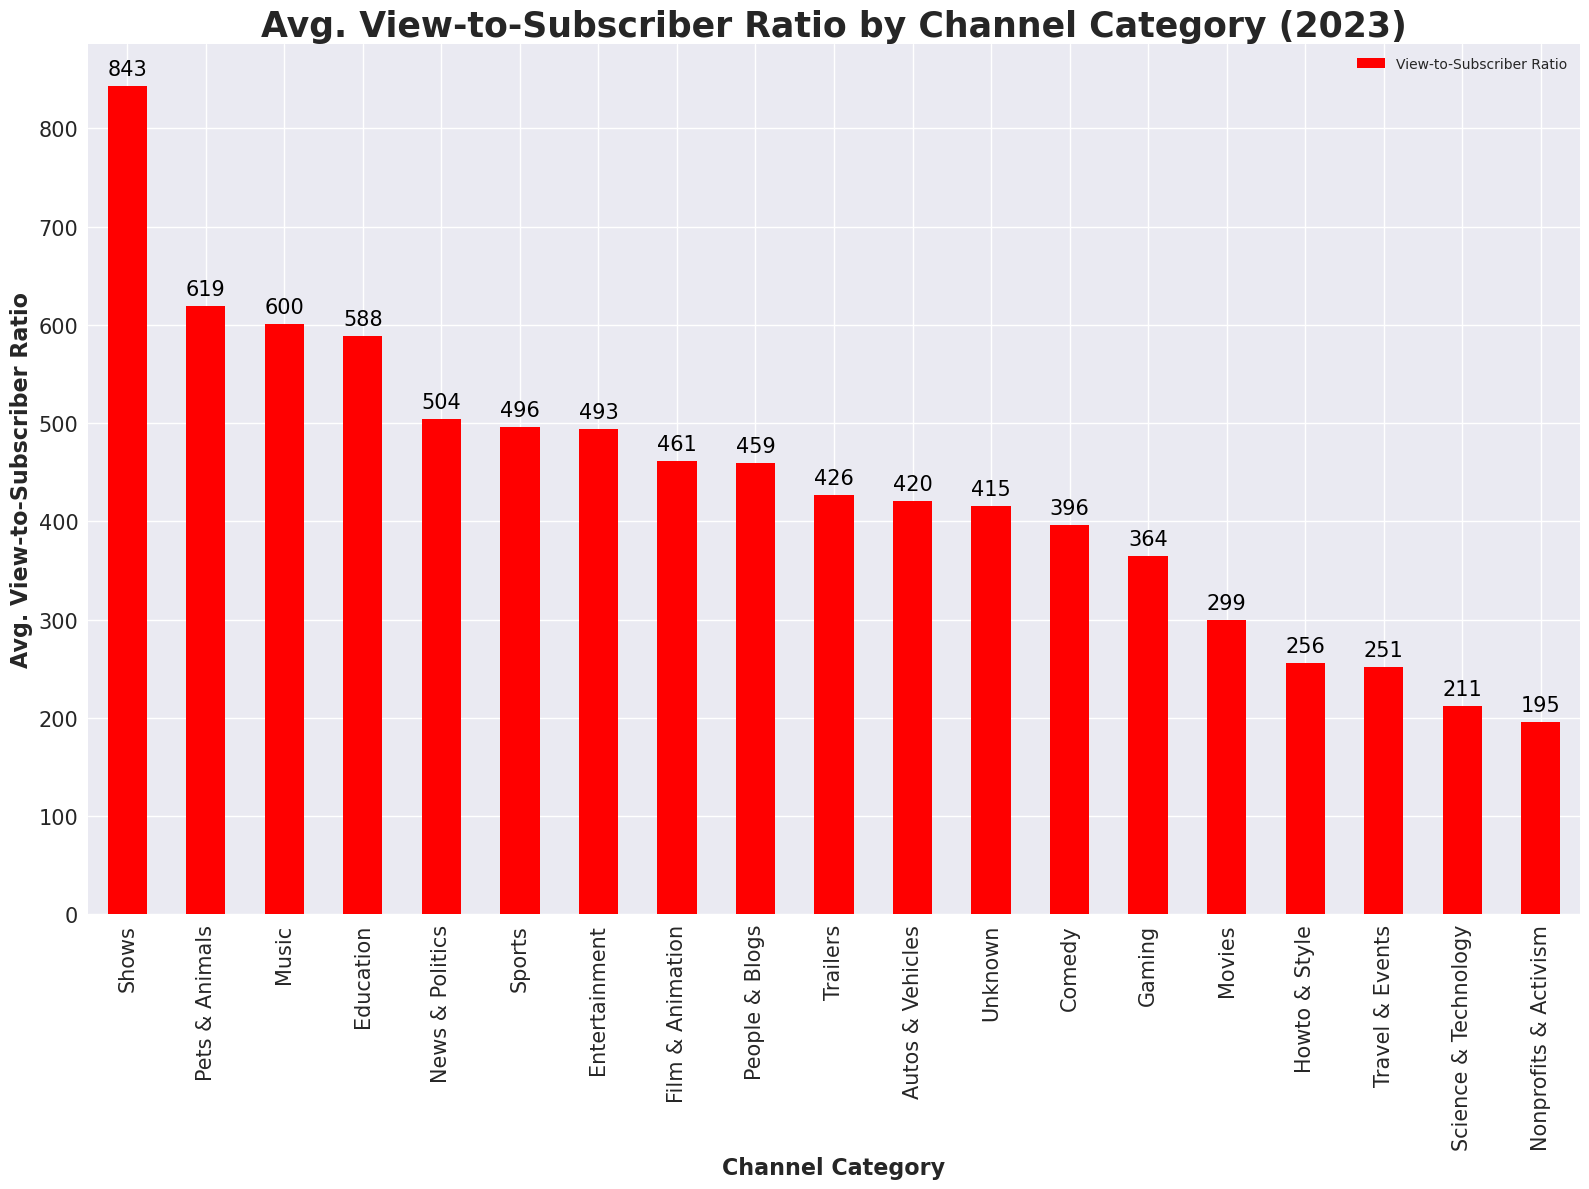

In [49]:
# Plot df as a bar chart
ax = category_sum_raw.plot(kind = 'bar', stacked = True, x = 'Category', y = 'View-to-Subscriber Ratio', color = '#FF0000')

# Add data labels above the bars
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', labels=[f'{int(val)}' for val in bar.datavalues], color='black', fontsize=15, padding=5)

# Adjusting the chart formatting
plt.title('Avg. View-to-Subscriber Ratio by Channel Category (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('Channel Category', fontsize = 16,  weight = 'bold')
plt.ylabel('Avg. View-to-Subscriber Ratio', fontsize = 16, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()

**Observations**

1. The 'Shows' category has an average view-to-subscriber ratio that is ~25% higher than the next highest category. A high view-to-subsriber ratio may be due to a number of reasons: 
* Loyal Fanbase: The channel's subscribers frequently return to watch new content, indicating a strong connection between the content creator and the audience
* High Engagement: Subscribers are actively watching the content regularly, possibly even re-watching videos, leading to more views per subscriber
* High-Quality Content: Content is compelling enough that subscribers consistently watch, rather than skipping over videos in their feed

2. In comparison to categories with low view-to-subscriber ratios e.g. 'Travel & Events' there could be several reasons why this is the case such as:
* Viral Content: The channel might have a few videos that have gone viral, bringing in a large number of views but not necessarily converting those viewers into subscribers
* Broad Appeal: The content has a wide appeal and is often shared or embedded on various platforms outside of YouTube, driving views from people who aren't necessarily looking to subscribe
* Search-friendly Content: The channel creates content that answers common questions or covers popular topics, making their videos highly discoverable through YouTube or Google searches. However, after getting the answer or information they need, viewers might not feel the need to subscribe

## 6.10 What are the Most Common Words in High-View Channel Names?

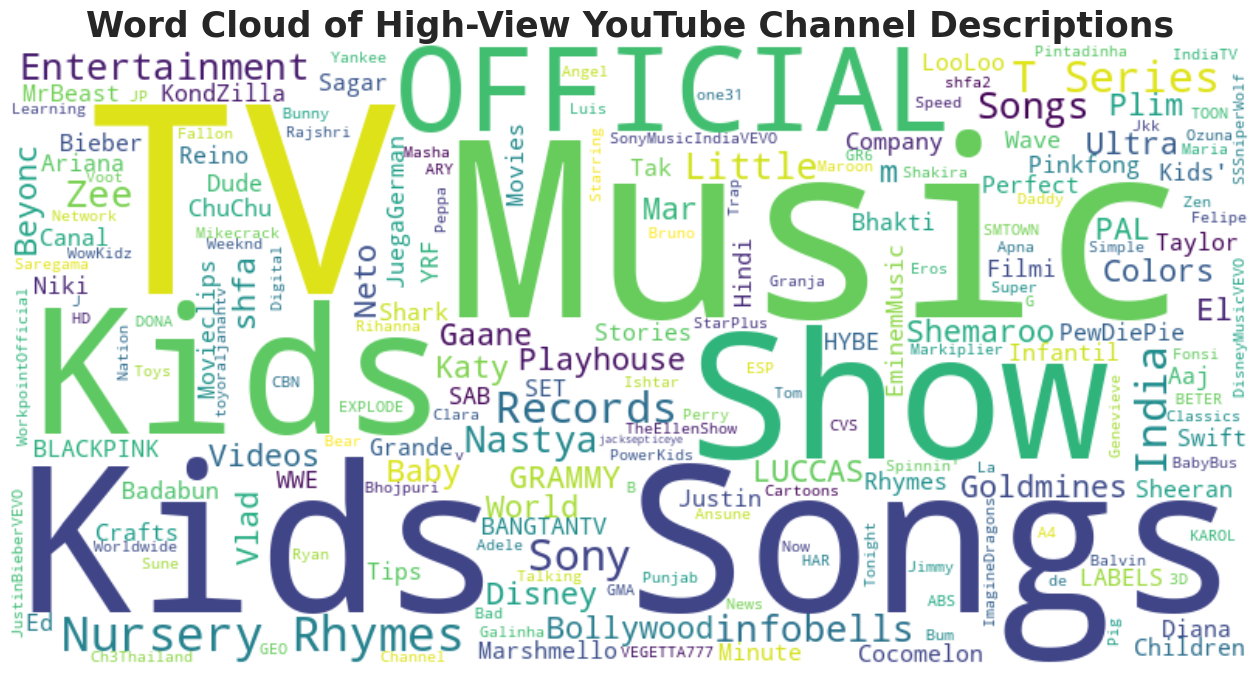

In [50]:
# Determine the 75th percentile of video views
percentile_75th = df['Video Views'].quantile(0.75)

# Filter channels with views above the 75th percentile
high_view_channels = df[df['Video Views'] > percentile_75th]

# Combine the names of high-view channels into a single string
text = ' '.join(high_view_channels['Youtuber'])

# Create the word cloud
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400).generate(text)

# Plot the word cloud
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of High-View YouTube Channel Descriptions', fontsize = 25, weight = 'bold')
plt.show()

**Observations**

1. The most prominent words in the Word Cloud such as 'Music', 'Kids', 'Songs', 'Entertainment', 'Nursery Rhymes', 'Records' etc. correlate strongly with trends in popular channel categories that have been observed throughout this analysis such as 'Music', 'Entertainment', 'TV', 'Shows' etc. 

2. The strong correlation between YouTube channel name & channel category may be due to several reasons such as:
* Clear Branding: Creators often want their channel name to reflect the kind of content they produce. This makes it easier for potential subscribers to instantly understand the channel's focus. A name that aligns with its content offers clearer branding and helps set audience expectations
* Discoverability: Channels often include keywords in their names that are commonly searched for in their category. This can help in improving the channel's visibility in search results. For instance, a fitness channel might include words like "workout," "fitness," or "gym" in its name to attract viewers searching for those terms
* Consistency with Content: If a channel's name aligns with its category, it provides a consistent experience for viewers. For example, if a channel named "EpicTravelVlogs" falls under the 'Travel' category, it's consistent with what viewers would expect based on the name

## 6.11 Which Categories are Potentially the Most Lucrative Based on Avg. Monthly Earnings

In [51]:
# Calculate avg. monthly averages per category rounded to 0 decimal places
df['Avg. Monthly Earnings'] = (df['Lowest Monthly Earnings'] + df['Highest Monthly Earnings']) / 2

# Create new df to group by category & calculate mean avg. monthly earnings by category
category_avg_earnings = df.groupby('Category').agg({
    'Avg. Monthly Earnings': 'mean',
    }).reset_index()

# Create new column to reflect avg. monthly earnings in thousands, rounded down to nearest whole number 
category_avg_earnings['Avg. Monthly Earnings ($000s)'] = (category_avg_earnings['Avg. Monthly Earnings'] / 1000).astype(int)
category_avg_earnings

# Sort categories by no. Subscribers (mn.)
category_avg_earnings = category_avg_earnings.sort_values(by = 'Avg. Monthly Earnings ($000s)', ascending = False)

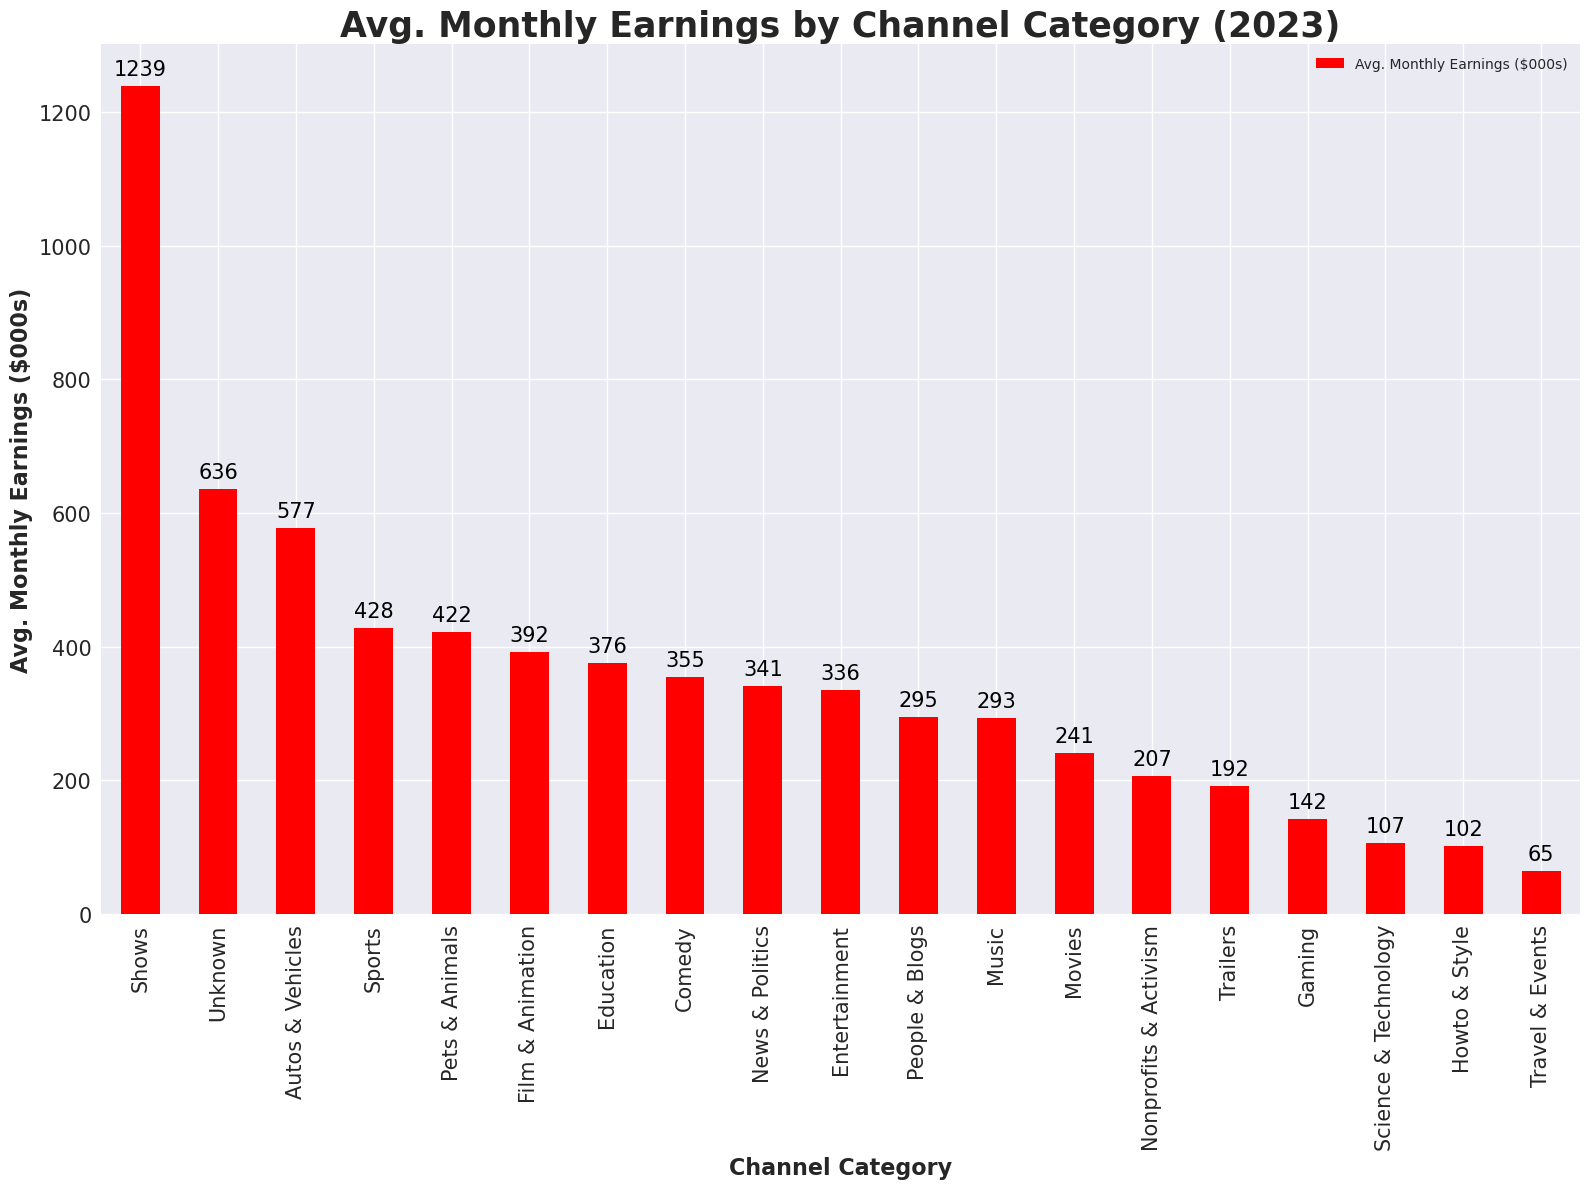

In [52]:
# Plot df as a bar chart
ax = category_avg_earnings.plot(kind = 'bar', stacked = True, x = 'Category', y = 'Avg. Monthly Earnings ($000s)', color = '#FF0000')

# Add data labels above the bars
for bar in ax.containers:
    ax.bar_label(bar, label_type = 'edge', color = 'black', fontsize = 15, padding = 5)

# Adjusting the chart formatting
plt.title('Avg. Monthly Earnings by Channel Category (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('Channel Category', fontsize = 16,  weight = 'bold')
plt.ylabel('Avg. Monthly Earnings ($000s)', fontsize = 16, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

**Observations**

1. The 'Shows' category stands out remarkably in terms of channel monetization. It boasts average monthly earnings that are approximately 50% greater than its closest competitor, firmly establishing it as the outlier in revenue generation

2. Despite previous trend analyses pointing towards 'Music' and 'Entertainment' as the leading categories in popularity, they surprisingly find themselves in the mid to lower tiers when it comes to average monthly earnings. This divergence raises intriguing questions about the relationship between viewership, popularity, and revenue potential on the platform

3. For aspiring creators, selecting a niche based solely on channel popularity might not translate to higher revenue. If monetisation is the primary goal, a closer examination of high-earning categories, rather than just popular ones, would offer a more strategic approach to channel creation

## 6.12 Is There a Correlation Between the Number of Views and Estimated Revenue?

In [53]:
df_sub_pop_4 = df[['Video Views', 'Avg. Monthly Earnings']].copy()

df_sub_pop_4['Video Views (bn.)'] = df_sub_pop_4['Video Views'] / 1000000000
df_sub_pop_4['Avg. Monthly Earnings ($000s)'] = df_sub_pop_4['Avg. Monthly Earnings'] / 1000

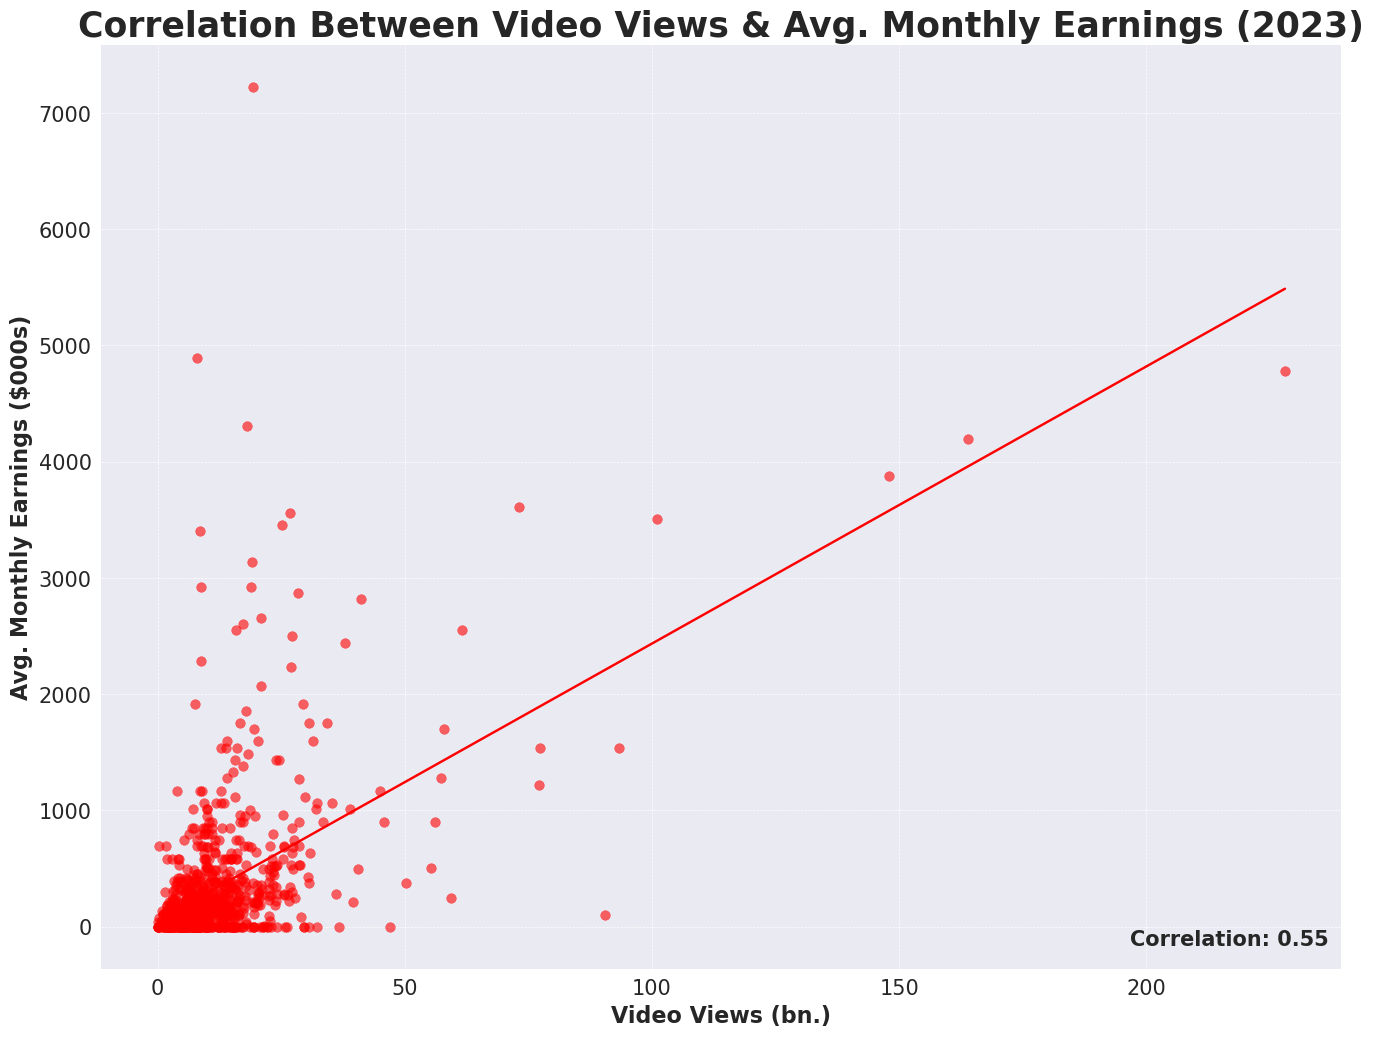

In [54]:
# Calculate the correlation coefficient
correlation = df_sub_pop_4['Video Views (bn.)'].corr(df_sub_pop_4['Avg. Monthly Earnings ($000s)'])

# Create linear regression for trend line
m, b = np.polyfit(df_sub_pop_4['Video Views (bn.)'], df_sub_pop_4['Avg. Monthly Earnings ($000s)'], 1)

# Sort data by 'Video Views (bn.)'
df_sub_pop_4 = df_sub_pop_4.sort_values(by='Video Views (bn.)')

# Set scaling factor of circle size
scaling_factor = 4 

# Set figuresize
plt.figure(figsize = (16, 12))

# Calculate the size of circles 
sizes = df_sub_pop_4['Video Views (bn.)'] * scaling_factor

# Plot df as a scatter
plt.scatter(df_sub_pop_4['Video Views (bn.)'], df_sub_pop_4['Avg. Monthly Earnings ($000s)'], color = '#FF0000', alpha = 0.6)

# Plot trendline
plt.plot(df_sub_pop_4['Video Views (bn.)'], m * df_sub_pop_4['Video Views (bn.)'] + b, color = '#FF0000')

# Adjust chart formatting 
plt.title('Correlation Between Video Views & Avg. Monthly Earnings (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('Video Views (bn.)', fontsize = 16, weight = 'bold')
plt.ylabel('Avg. Monthly Earnings ($000s)', fontsize = 16, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.annotate(f'Correlation: {correlation:.2f}', 
             xy = (0.83, 0.025), 
             xycoords = 'axes fraction', 
             fontsize = 15, 
             weight = 'bold')

plt.show()

**Observations**

1. Not Just About Views: While there is a positive relationship, the correlation is not extremely strong. This indicates that simply amassing a high number of views doesn't guarantee proportionally high earnings. Other factors, possibly including video length, engagement metrics, or ad placements, could significantly influence a channel's revenue

2. Quality Over Quantity: A moderate correlation suggests that the quality of views (e.g., viewer retention, click-through rates on ads, premium views) may matter more than sheer volume. Channels focusing on creating engaging, high-quality content that keeps viewers watching could potentially earn more, even with fewer views

3. Diverse Revenue Streams: This correlation reinforces the idea that many successful YouTubers might have diversified revenue streams. Merchandise sales, sponsored content, affiliate marketing, and fan donations could be contributing to their earnings, making them less dependent on traditional ad revenue from views alone

# 7. Concluding Observations

While numerous factors determine the success of a YouTube channel, this analysis, which examined only a handful of variables, has revealed several key trends. Aspiring YouTube creators should note these findings, but a more comprehensive and targeted analysis would be beneficial to gain deeper insights:

**1. Subscriber Engagement and Niche Selection:**

* A robust subscriber base tends to drive more video views therefore creators should focus on building a loyal audience
* The 'Entertainment', 'Music', 'Gaming', and 'Comedy' categories dominate in popularity, while 'Education' and 'How-to & Style' also find solid ground
* 'Shows' have a high view-to-subscriber ratio, hinting at loyal fanbases and high-quality content. 'Travel & Events', however, tend to have more views than subscribers, likely due to viral or search-friendly content

**2. Monetisation Isn't Just About Views:**

* While views do correlate with earnings, the relationship isn't linear. Channel earnings can also depend on factors like engagement, video length, and ad placements
* Categories like 'Shows' offer significant monetization opportunities, even though 'Music' and 'Entertainment' are more popular

**3. Quality Over Quantity:**

* Uploading more videos doesn’t necessarily increase earnings. Aspiring creators should focus on the quality and relevance of content
* Some channels with fewer videos but high earnings may be leveraging trends effectively

**4. Global Trends and Branding:**

* The U.S. and India dominate the YouTube scene, but a diverse representation can offer unique opportunities
* Channel names often reflect content types, helping with branding and discoverability. Ensure that your channel name aligns with your content focus

**5. Diversify Revenue Streams:**

* Beyond ad revenue, consider merchandise, sponsorships, affiliate marketing, and fan donations. Successful YouTubers often harness multiple revenue streams, reducing dependency on views alone